# Multi-Part Ocean Regression - Decision Trees

In [1]:
#Data Processing and Management
import os
import glob
import csv
import pandas as pd
import numpy as np
import math


#ML Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Model and Data Analysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Imaging and Plotting
import matplotlib.pyplot as plt

### Import Data

In [2]:
path = r'PATH'

#Pull in Wavenumbers for Plotting
wavenumbers = pd.read_csv(path + '//'+'Wavenumbers.csv')
#Pull in water references
water =pd.read_csv(path + '//'+'Water.csv')

#Lab Water Samples with Spikes
N_Dataset = pd.read_csv(path + '//'+'N_Dataset.csv')
N_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_N_Samples.csv')
N_Concs.drop(columns=N_Concs.columns[0], axis=1, inplace=True)
#Field Samples with Spikes
F_Dataset = pd.read_csv(path + '//'+'F_Dataset.csv')
F_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_F_Samples.csv')
F_Concs.drop(columns=F_Concs.columns[0], axis=1, inplace=True)
#Field Samples Without Spikes
Field_Samples = pd.read_csv(path + '//'+'Field_Samples.csv')
Field_Concs = pd.read_csv(path + '//'+'Ocean_ML_Concs_FIELD.csv')
Field_Concs.drop(columns=Field_Concs.columns[0], axis=1, inplace=True)
Field_Concs = Field_Concs.T

# Preprocessing

In [3]:
#Lab Samples w/ Spikes
#Baseline Correction
avg = N_Dataset.iloc[500:800,:].mean()
N_Dataset.iloc[0:1000,:] = N_Dataset.iloc[0:1000,:] - avg
#Normalization
N_Dataset = N_Dataset/N_Dataset.iloc[1100,:]

#Field Samples w/ Spikes
#Baseline Correction
avg = F_Dataset.iloc[500:800,:].mean()
F_Dataset.iloc[0:1000,:] = F_Dataset.iloc[0:1000,:] - avg
#Normalization
F_Dataset = F_Dataset/F_Dataset.iloc[1100,:]

#Field Samples w/o Spikes
#Baseline Correction
avg = Field_Samples.iloc[500:800,:].mean()
Field_Samples.iloc[0:1000,:] = Field_Samples.iloc[0:1000,:] - avg
#Normalization
Field_Samples = Field_Samples/Field_Samples.iloc[1100,:]

### Information Regarding Format of Concs Files

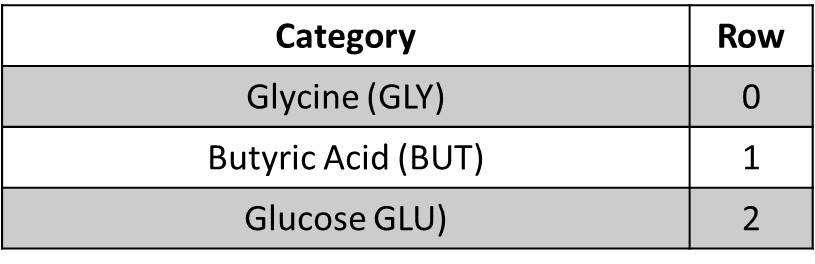

In [4]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(N_Dataset.T, N_Concs.T, test_size=0.3, random_state=42)
X_Validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Glycine

In [5]:
# initialize regressor & fit
regressor = DecisionTreeRegressor(random_state=42, min_samples_split = 5, criterion = 'absolute_error', splitter = 'best')
regressor.fit(X_train,y_train[0])

y_calibrate = regressor.predict(X_train) #Final Training Results
y_pred_GLY = regressor.predict(X_test) # Final Testing Results
y_val = regressor.predict(X_Validate)
y_un_pred_GLY = regressor.predict(Field_Samples.T) # predict on new data

In [6]:
# print mean sq. err
print("*DT Model Statistics - GLYCINE*")
print('R Squared Score: %4f' % metrics.r2_score(y_train[0], y_calibrate))
print('________________________________________________________________')
print("-Errors from Calibration-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_train[0], y_calibrate, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_train[0], y_calibrate) + ' M')
print('________________________________________________________________')
print("-Errors from Testing Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_test[0], y_pred_GLY, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_test[0], y_pred_GLY) + ' M')
print('________________________________________________________________')
print("-Errors from Validation Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_validate[0], y_val, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_validate[0], y_val) + ' M')

*DT Model Statistics - GLYCINE*
R Squared Score: 0.988912
________________________________________________________________
-Errors from Calibration-
RMSE: 2.6578 M
Mean Absolute Error: 0.666121 M
________________________________________________________________
-Errors from Testing Data-
RMSE: 10.4792 M
Mean Absolute Error: 4.571016 M
________________________________________________________________
-Errors from Validation Data-
RMSE: 26.7769 M
Mean Absolute Error: 10.111781 M


###  Butyric Acid

In [7]:
# initialize regressor & fit
regressor = DecisionTreeRegressor(random_state=42, min_samples_split = 5, criterion = 'absolute_error', splitter = 'best')
regressor.fit(X_train,y_train[1])

y_calibrate = regressor.predict(X_train) #Final Training Results
y_pred_BUT = regressor.predict(X_test) # Final Testing Results
y_val = regressor.predict(X_Validate)
y_un_pred_BUT = regressor.predict(Field_Samples.T) # predict on new data

In [8]:
# print mean sq. err
print("*DT Model Statistics - BUTYRIC ACID*")
print('R Squared Score: %4f' % metrics.r2_score(y_train[1], y_calibrate))
print('________________________________________________________________')
print("-Errors from Calibration-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_train[1], y_calibrate, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_train[1], y_calibrate) + ' M')
print('________________________________________________________________')
print("-Errors from Testing Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_test[1], y_pred_BUT, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_test[1], y_pred_BUT) + ' M')
print('________________________________________________________________')
print("-Errors from Validation Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_validate[1], y_val, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_validate[1], y_val) + ' M')

*DT Model Statistics - BUTYRIC ACID*
R Squared Score: 0.989312
________________________________________________________________
-Errors from Calibration-
RMSE: 2.4445 M
Mean Absolute Error: 0.956404 M
________________________________________________________________
-Errors from Testing Data-
RMSE: 25.9452 M
Mean Absolute Error: 17.497342 M
________________________________________________________________
-Errors from Validation Data-
RMSE: 30.8802 M
Mean Absolute Error: 24.496387 M


### Glucose

In [9]:
# initialize regressor & fit
regressor = DecisionTreeRegressor(random_state=42, min_samples_split = 5, criterion = 'absolute_error', splitter = 'best')
regressor.fit(X_train,y_train[2])

y_calibrate = regressor.predict(X_train) #Final Training Results
y_pred_GLU = regressor.predict(X_test) # Final Testing Results
y_val = regressor.predict(X_Validate)
y_un_pred_GLU = regressor.predict(Field_Samples.T) # predict on new data

In [10]:
# print mean sq. err
print("*DT Model Statistics - GLUCOSE*")
print('R Squared Score: %4f' % metrics.r2_score(y_train[2], y_calibrate))
print('________________________________________________________________')
print("-Errors from Calibration-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_train[2], y_calibrate, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_train[2], y_calibrate) + ' M')
print('________________________________________________________________')
print("-Errors from Testing Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_test[2], y_pred_GLU, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_test[2], y_pred_GLU) + ' M')
print('________________________________________________________________')
print("-Errors from Validation Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_validate[2], y_val, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_validate[2], y_val) + ' M')

*DT Model Statistics - GLUCOSE*
R Squared Score: 0.957787
________________________________________________________________
-Errors from Calibration-
RMSE: 5.2552 M
Mean Absolute Error: 2.602652 M
________________________________________________________________
-Errors from Testing Data-
RMSE: 30.9535 M
Mean Absolute Error: 19.993435 M
________________________________________________________________
-Errors from Validation Data-
RMSE: 46.1054 M
Mean Absolute Error: 38.334908 M


### Evaluate Test Data Fit

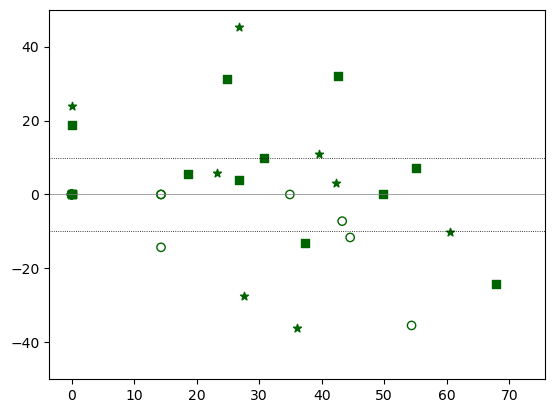

In [11]:
plt.scatter(y_test[0], y_pred_GLY - y_test[0], marker = 'o', facecolors='none', color = 'darkgreen', label = "Glycine")
plt.scatter(y_test[1], y_pred_BUT - y_test[1], marker = 's', color = 'darkgreen', label = "Butyric Acid")
plt.scatter(y_test[2], y_pred_GLU - y_test[2], marker = '*', color = 'darkgreen', label = "Glucose")
plt.ylim(-50,50)
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(10, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(-10, color = 'k', linewidth = 0.6, linestyle = ':')

#plt.title("Test Data on Lab Sample Model")

### Test on Field Samples

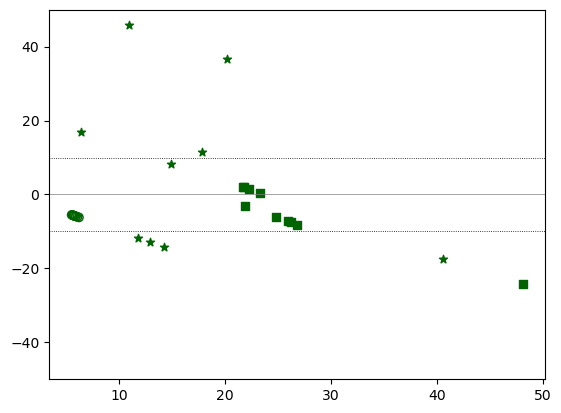

In [12]:
plt.scatter(Field_Concs[0], y_un_pred_GLY - Field_Concs[0], marker = 'o', facecolors='none', color = 'darkgreen', label = "Glycine")
plt.scatter(Field_Concs[1], y_un_pred_BUT - Field_Concs[1], marker = 's',  color = 'darkgreen', label = "Butyric Acid")
plt.scatter(Field_Concs[2], y_un_pred_GLU - Field_Concs[2], marker = '*', color = 'darkgreen', label = "Glucose")
plt.ylim(-50,50)
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(10, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(-10, color = 'k', linewidth = 0.6, linestyle = ':')

#plt.title("Field Samples Tested on Lab Sample Model")

### Export Results

In [13]:
Model_Results = pd.DataFrame()
#Glycine (GLY)
Model_Results['Glycine_True'] = Field_Concs[0]
Model_Results['Glycine'] = y_un_pred_GLY
GLY_Diff = np.array(y_un_pred_GLY - Field_Concs[0])
Model_Results['Glycine_Diff'] = GLY_Diff
#Butyric Acid (BUT)
Model_Results['Butyric_Acid_True'] = Field_Concs[1]
Model_Results['Butyric_Acid'] = y_un_pred_BUT
BUT_Diff = np.array(y_un_pred_BUT - Field_Concs[1])
Model_Results['Butyric_Acid_Diff'] = BUT_Diff
#Glucose (GLU)
Model_Results['Glucose_True'] = Field_Concs[2]
Model_Results['Glucose'] = y_un_pred_GLU
GLU_Diff = np.array(y_un_pred_GLU - Field_Concs[2])
Model_Results['Glucose_Diff'] = GLU_Diff

Model_Results.to_csv(path + '\\'+'Model_Results'+'\\'+'N_Field_Sample_DT.csv', index = False, encoding='utf-8') # False: not include index

In [14]:
#Glycine (GLY)
GLY_20 = (max(Model_Results['Glycine_True'])/10)*2
GLY_20_count = 0
for i in Model_Results['Glycine_Diff']:
    if ((i <= GLY_20) and (i >= -GLY_20)):
        GLY_20_count = GLY_20_count +1
print("Glycine:  " + str(GLY_20_count))

#Butyric Acid (BUT)
BUT_20 = (max(Model_Results['Butyric_Acid_True'])/10)*2
BUT_20_count = 0
for i in Model_Results['Butyric_Acid_Diff']:    
    if ((i <= BUT_20) and (i >= -BUT_20)):
        BUT_20_count = BUT_20_count +1
print("Butyric Acid :  " + str(BUT_20_count))

#Glucose (GLU)
GLU_20 = (max(Model_Results['Glucose_True'])/10)*2
GLU_20_count = 0
for i in Model_Results['Glucose_Diff']:
    if ((i <= GLU_20) and (i >= -GLU_20)):
        GLU_20_count = GLU_20_count +1
print("Glucose :  " + str(GLU_20_count))

Glycine:  0
Butyric Acid :  9
Glucose :  0


## Field Spiked Sample Model

In [15]:
# train test data split
X_train, X_test, y_train, y_test = train_test_split(F_Dataset.T, F_Concs.T, test_size=0.3, random_state=42)
X_Validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Glycine

In [16]:
# initialize regressor & fit
regressor = DecisionTreeRegressor(random_state=42, min_samples_split = 5, criterion = 'absolute_error', splitter = 'best')
regressor.fit(X_train,y_train[0])

y_calibrate = regressor.predict(X_train) #Final Training Results
y_pred_GLY = regressor.predict(X_test) # Final Testing Results
y_val = regressor.predict(X_Validate)
y_un_pred_GLY = regressor.predict(Field_Samples.T) # predict on new data

In [17]:
# print mean sq. err
print("*DT Model Statistics - GLYCINE*")
print('R Squared Score: %4f' % metrics.r2_score(y_train[0], y_calibrate))
print('________________________________________________________________')
print("-Errors from Calibration-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_train[0], y_calibrate, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_train[0], y_calibrate) + ' M')
print('________________________________________________________________')
print("-Errors from Testing Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_test[0], y_pred_GLY, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_test[0], y_pred_GLY) + ' M')
print('________________________________________________________________')
print("-Errors from Validation Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_validate[0], y_val, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_validate[0], y_val) + ' M')

*DT Model Statistics - GLYCINE*
R Squared Score: 0.992130
________________________________________________________________
-Errors from Calibration-
RMSE: 1.8047 M
Mean Absolute Error: 0.457493 M
________________________________________________________________
-Errors from Testing Data-
RMSE: 25.5614 M
Mean Absolute Error: 16.689714 M
________________________________________________________________
-Errors from Validation Data-
RMSE: 26.7576 M
Mean Absolute Error: 13.834991 M


###  Butyric Acid

In [18]:
# initialize regressor & fit
regressor = DecisionTreeRegressor(random_state=42, min_samples_split = 5, criterion = 'absolute_error', splitter = 'best')
regressor.fit(X_train,y_train[1])

y_calibrate = regressor.predict(X_train) #Final Training Results
y_pred_BUT = regressor.predict(X_test) # Final Testing Results
y_val = regressor.predict(X_Validate)
y_un_pred_BUT = regressor.predict(Field_Samples.T) # predict on new data

In [19]:
# print mean sq. err
print("*DT Model Statistics - BUTYRIC ACID*")
print('R Squared Score: %4f' % metrics.r2_score(y_train[1], y_calibrate))
print('________________________________________________________________')
print("-Errors from Calibration-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_train[1], y_calibrate, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_train[1], y_calibrate) + ' M')
print('________________________________________________________________')
print("-Errors from Testing Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_test[1], y_pred_BUT, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_test[1], y_pred_BUT) + ' M')
print('________________________________________________________________')
print("-Errors from Validation Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_validate[1], y_val, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_validate[1], y_val) + ' M')

*DT Model Statistics - BUTYRIC ACID*
R Squared Score: 0.994923
________________________________________________________________
-Errors from Calibration-
RMSE: 1.7153 M
Mean Absolute Error: 0.877638 M
________________________________________________________________
-Errors from Testing Data-
RMSE: 20.3327 M
Mean Absolute Error: 10.345868 M
________________________________________________________________
-Errors from Validation Data-
RMSE: 23.1856 M
Mean Absolute Error: 16.519228 M


### Glucose

In [20]:
# initialize regressor & fit
regressor = DecisionTreeRegressor(random_state=42, min_samples_split = 5, criterion = 'absolute_error', splitter = 'best')
regressor.fit(X_train,y_train[2])

y_calibrate = regressor.predict(X_train) #Final Training Results
y_pred_GLU = regressor.predict(X_test) # Final Testing Results
y_val = regressor.predict(X_Validate)
y_un_pred_GLU = regressor.predict(Field_Samples.T) # predict on new data

In [21]:
# print mean sq. err
print("*DT Model Statistics - GLUCOSE*")
print('R Squared Score: %4f' % metrics.r2_score(y_train[2], y_calibrate))
print('________________________________________________________________')
print("-Errors from Calibration-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_train[2], y_calibrate, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_train[2], y_calibrate) + ' M')
print('________________________________________________________________')
print("-Errors from Testing Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_test[2], y_pred_GLU, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_test[2], y_pred_GLU) + ' M')
print('________________________________________________________________')
print("-Errors from Validation Data-")
print('RMSE: %.4f' % math.sqrt(mean_squared_error(y_validate[2], y_val, squared = True)) + ' M')
print('Mean Absolute Error: %4f' % metrics.mean_absolute_error(y_validate[2], y_val) + ' M')

*DT Model Statistics - GLUCOSE*
R Squared Score: 0.964599
________________________________________________________________
-Errors from Calibration-
RMSE: 5.4785 M
Mean Absolute Error: 2.082282 M
________________________________________________________________
-Errors from Testing Data-
RMSE: 39.3556 M
Mean Absolute Error: 27.522066 M
________________________________________________________________
-Errors from Validation Data-
RMSE: 44.0802 M
Mean Absolute Error: 34.719939 M


### Evaluate Test Data  Fit

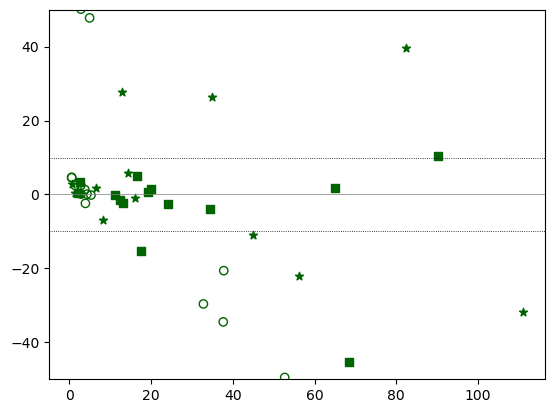

In [22]:
plt.scatter(y_test[0], y_pred_GLY - y_test[0], marker = 'o', facecolors='none', color = 'darkgreen', label = "Glycine")
plt.scatter(y_test[1], y_pred_BUT - y_test[1], marker = 's', color = 'darkgreen', label = "Butyric Acid")
plt.scatter(y_test[2], y_pred_GLU - y_test[2], marker = '*', color = 'darkgreen', label = "Glucose")
plt.ylim(-50,50)
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(10, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(-10, color = 'k', linewidth = 0.6, linestyle = ':')

#plt.title("Test Data on Field Sample Model")

### Test on Field Samples

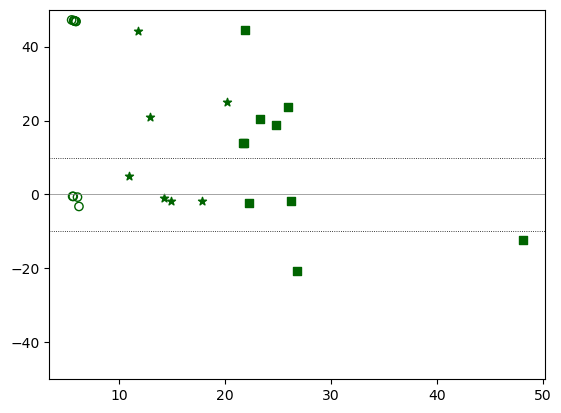

In [23]:
plt.scatter(Field_Concs[0], y_un_pred_GLY - Field_Concs[0], marker = 'o', facecolors='none', color = 'darkgreen', label = "Glycine")
plt.scatter(Field_Concs[1], y_un_pred_BUT - Field_Concs[1], marker = 's', color = 'darkgreen', label = "Butyric Acid")
plt.scatter(Field_Concs[2], y_un_pred_GLU - Field_Concs[2], marker = '*', color = 'darkgreen', label = "Glucose")
plt.ylim(-50,50)
plt.axhline(0, color = 'grey', linewidth = 0.5)
plt.axhline(10, color = 'k', linewidth = 0.6, linestyle = ':')
plt.axhline(-10, color = 'k', linewidth = 0.6, linestyle = ':')

#plt.title("Field Samples Tested on Field Sample Model")

### Export Results

In [24]:
Model_Results = pd.DataFrame()
#Glycine (GLY)
Model_Results['Glycine_True'] = Field_Concs[0]
Model_Results['Glycine'] = y_un_pred_GLY
GLY_Diff = np.array(y_un_pred_GLY - Field_Concs[0])
Model_Results['Glycine_Diff'] = GLY_Diff
#Butyric Acid (BUT)
Model_Results['Butyric_Acid_True'] = Field_Concs[1]
Model_Results['Butyric_Acid'] = y_un_pred_BUT
BUT_Diff = np.array(y_un_pred_BUT - Field_Concs[1])
Model_Results['Butyric_Acid_Diff'] = BUT_Diff
#Glucose (GLU)
Model_Results['Glucose_True'] = Field_Concs[2]
Model_Results['Glucose'] = y_un_pred_GLU
GLU_Diff = np.array(y_un_pred_GLU - Field_Concs[2])
Model_Results['Glucose_Diff'] = GLU_Diff

Model_Results.to_csv(path + '\\'+'Model_Results'+'\\'+'F_Field_Sample_DT.csv', index = False, encoding='utf-8') # False: not include index

In [25]:
#Glycine (GLY)
GLY_20 = (max(Model_Results['Glycine_True'])/10)*2
GLY_20_count = 0
for i in Model_Results['Glycine_Diff']:
    if ((i <= GLY_20) and (i >= -GLY_20)):
        GLY_20_count = GLY_20_count +1
print("Glycine:  " + str(GLY_20_count))

#Butyric Acid (BUT)
BUT_20 = (max(Model_Results['Butyric_Acid_True'])/10)*2
BUT_20_count = 0
for i in Model_Results['Butyric_Acid_Diff']:    
    if ((i <= BUT_20) and (i >= -BUT_20)):
        BUT_20_count = BUT_20_count +1
print("Butyric Acid :  " + str(BUT_20_count))

#Glucose (GLU)
GLU_20 = (max(Model_Results['Glucose_True'])/10)*2
GLU_20_count = 0
for i in Model_Results['Glucose_Diff']:
    if ((i <= GLU_20) and (i >= -GLU_20)):
        GLU_20_count = GLU_20_count +1
print("Glucose :  " + str(GLU_20_count))

Glycine:  3
Butyric Acid :  2
Glucose :  4
